<a href="https://colab.research.google.com/github/yadgire7/Machine-Learning/blob/master/Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Saurabh Arun Yadgire USC ID: 8065527198 Github ID:yadgire7

Resources:
1. https://scikit-learn.org/stable/modules/tree.html
2. https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
3. https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime (for refering to colun names for Q.2)
4. https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns
5. https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
6. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
7. http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html
8. https://stats.stackexchange.com/questions/86434/is-standardisation-before-lasso-really-necessary
9. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
10. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
11. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
12. https://www.youtube.com/watch?v=0B5eIE_1vpU
13. https://stackoverflow.com/questions/69429691/gridsearchcv-not-choosing-the-best-hyperparameters-for-xgboost


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import graphviz
import csv
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, LassoCV,Lasso
import math
from xgboost import XGBRegressor
import warnings

In [ ]:
data = pd.read_csv(r"../Data/diagnosis.data",encoding='utf-16', sep='\t', names=['Temperature','Nausea','Lumbar','Urine','Micturition','Urethra','Bladder','Pelvis'])
print(data)

    Temperature Nausea Lumbar Urine Micturition Urethra Bladder Pelvis
0          35,5     no    yes    no          no      no      no     no
1          35,9     no     no   yes         yes     yes     yes     no
2          35,9     no    yes    no          no      no      no     no
3          36,0     no     no   yes         yes     yes     yes     no
4          36,0     no    yes    no          no      no      no     no
..          ...    ...    ...   ...         ...     ...     ...    ...
115        41,4     no    yes   yes          no     yes      no    yes
116        41,5     no     no    no          no      no      no     no
117        41,5    yes    yes    no         yes      no      no    yes
118        41,5     no    yes   yes          no     yes      no    yes
119        41,5     no    yes   yes          no     yes      no    yes

[120 rows x 8 columns]


In [ ]:
print(data.columns)

Index(['Temperature', 'Nausea', 'Lumbar', 'Urine', 'Micturition', 'Urethra',
       'Bladder', 'Pelvis'],
      dtype='object')


In [ ]:
arr= data['Temperature'].to_numpy()
temp_arr=[]
for s in arr:
    s=s.replace(",",".")
    s=float(s)
    temp_arr.append(s)
data['Temperature']=temp_arr
col = ['Nausea', 'Lumbar', 'Urine', 'Micturition', 'Urethra',
       'Bladder', 'Pelvis']
features=['Temperature', 'Nausea', 'Lumbar', 'Urine', 'Micturition', 'Urethra']
classes=['Bladder', 'Pelvis']
for c in col:
    arr=data[c].to_numpy()
    insert_arr=[]
    for s in arr:
        if s=="no":
            insert_arr.append(0)
        else:
            insert_arr.append(1)
    data[c]=insert_arr
print(data)

     Temperature  Nausea  Lumbar  Urine  Micturition  Urethra  Bladder  Pelvis
0           35.5       0       1      0            0        0        0       0
1           35.9       0       0      1            1        1        1       0
2           35.9       0       1      0            0        0        0       0
3           36.0       0       0      1            1        1        1       0
4           36.0       0       1      0            0        0        0       0
..           ...     ...     ...    ...          ...      ...      ...     ...
115         41.4       0       1      1            0        1        0       1
116         41.5       0       0      0            0        0        0       0
117         41.5       1       1      0            1        0        0       1
118         41.5       0       1      1            0        1        0       1
119         41.5       0       1      1            0        1        0       1

[120 rows x 8 columns]


In [ ]:
print("Q.1.a\n")
x,y = data.iloc[:,:6],data.iloc[:,6:]
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
# print(x)

Q.1.a



In [ ]:
# print(y)

1.a.b



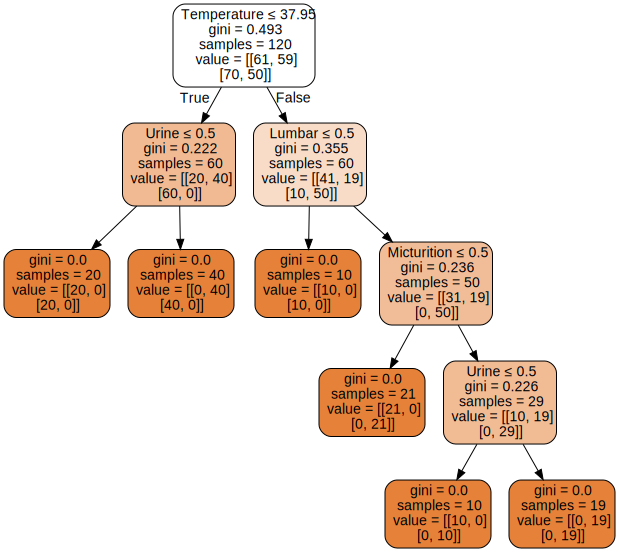

In [ ]:
print('1.a.b\n')
clf = tree.DecisionTreeClassifier()
clf.fit(x,y)
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=features,class_names=classes, filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
print('1.a.c\n')
text_rep = tree.export_text(clf)
print(text_rep)

1.a.c

|--- feature_0 <= 37.95
|   |--- feature_3 <= 0.50
|   |   |--- class: 0
|   |--- feature_3 >  0.50
|   |   |--- class: 1
|--- feature_0 >  37.95
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_4 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 0



# Plots

Q.1.d

alpha:0.0	score:1.0	no_of_nodes: 11	depth: 4

alpha:0.04908333333333333	score:1.0	no_of_nodes: 11	depth: 4

alpha:0.07947222222222226	score:0.7444444444444445	no_of_nodes: 5	depth: 2

alpha:0.1111111111111111	score:0.7444444444444445	no_of_nodes: 5	depth: 2

alpha:0.204236111111111	score:0.25555555555555554	no_of_nodes: 1	depth: 0



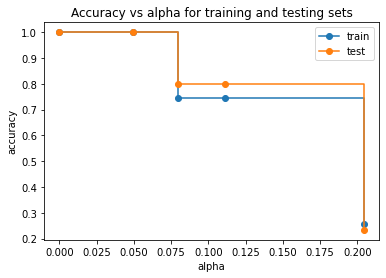

In [ ]:
print('Q.1.d\n')
path = clf.cost_complexity_pruning_path(x,y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
# As alpha increases, more of the tree is pruned,
# which increases the total impurity of its leaves and decreases the depth of the tree
clfs = []
node_counts=[]
depth=[]
train_scores=[]
test_scores=[]

for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train,y_train)
    clfs.append(clf)
    node_counts.append(clf.tree_.node_count)
    depth.append(clf.tree_.max_depth)
    train_scores.append(clf.score(x_train, y_train))
    test_scores.append(clf.score(x_test, y_test))
    print(f'alpha:{ccp_alpha}\tscore:{clf.score(x_train,y_train)}\tno_of_nodes: {clf.tree_.node_count}\tdepth: {clf.tree_.max_depth}\n')
# do we need to exclude the last alpha value
# and corres. decision tree as it has only one node.

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()



Neglecting aplha = 0 , as it is an ideal condition.
Best alpha:0.04908333333333333, as it has gives the best accuracy.

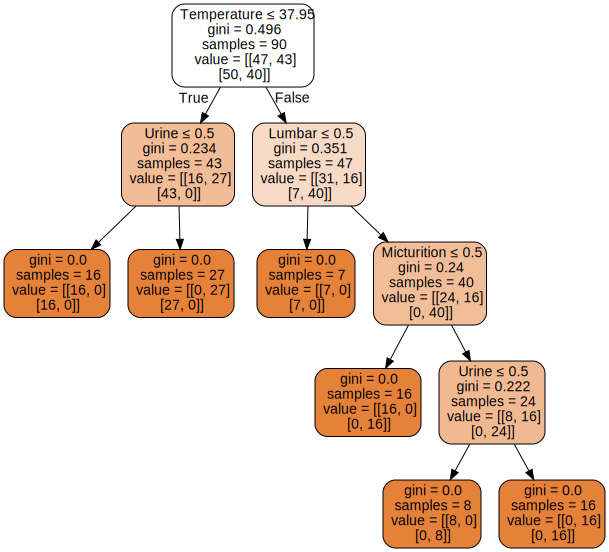

In [ ]:
best_alpha = ccp_alphas[1]
best_clf = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=best_alpha)
best_clf.fit(x_train,y_train)
dot_data = tree.export_graphviz(best_clf, out_file=None,feature_names=features,class_names=classes, filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph


In [ ]:
text_rep = tree.export_text(best_clf)
print(text_rep)

|--- feature_0 <= 37.95
|   |--- feature_3 <= 0.50
|   |   |--- class: 0
|   |--- feature_3 >  0.50
|   |   |--- class: 1
|--- feature_0 >  37.95
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_4 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 0



In [ ]:
print("Q.2.b\n")
cols =["state","county","community","communityname","fold","population","householdsize","racepctblack","racePctWhite",
"racePctAsian","racePctHisp","agePct12t21","agePct12t29","agePct16t24","agePct65up","numbUrban","pctUrban","medIncome",
"pctWWage","pctWFarmSelf","pctWInvInc","pctWSocSec","pctWPubAsst","pctWRetire","medFamInc","perCapInc","whitePerCap",
"blackPerCap","indianPerCap","AsianPerCap","OtherPerCap","HispPerCap","NumUnderPov","PctPopUnderPov","PctLess9thGrade",
"PctNotHSGrad","PctBSorMore","PctUnemployed","PctEmploy","PctEmplManu","PctEmplProfServ","PctOccupManu","PctOccupMgmtProf",
"MalePctDivorce","MalePctNevMarr","FemalePctDiv","TotalPctDiv","PersPerFam","PctFam2Par","PctKids2Par","PctYoungKids2Par",
"PctTeen2Par","PctWorkMomYoungKids","PctWorkMom","NumIlleg","PctIlleg","NumImmig","PctImmigRecent","PctImmigRec5",
"PctImmigRec8","PctImmigRec10","PctRecentImmig","PctRecImmig5","PctRecImmig8","PctRecImmig10","PctSpeakEnglOnly",
"PctNotSpeakEnglWell","PctLargHouseFam","PctLargHouseOccup","PersPerOccupHous","PersPerOwnOccHous","PersPerRentOccHous",
"PctPersOwnOccup","PctPersDenseHous","PctHousLess3BR","MedNumBR","HousVacant","PctHousOccup","PctHousOwnOcc","PctVacantBoarded",
"PctVacMore6Mos","MedYrHousBuilt","PctHousNoPhone","PctWOFullPlumb","OwnOccLowQuart","OwnOccMedVal","OwnOccHiQuart","RentLowQ",
"RentMedian","RentHighQ","MedRent","MedRentPctHousInc","MedOwnCostPctInc","MedOwnCostPctIncNoMtg","NumInShelters","NumStreet",
"PctForeignBorn","PctBornSameState","PctSameHouse85","PctSameCity85","PctSameState85","LemasSwornFT","LemasSwFTPerPop",
"LemasSwFTFieldOps","LemasSwFTFieldPerPop","LemasTotalReq","LemasTotReqPerPop","PolicReqPerOffic","PolicPerPop",
"RacialMatchCommPol","PctPolicWhite","PctPolicBlack","PctPolicHisp","PctPolicAsian","PctPolicMinor","OfficAssgnDrugUnits",
"NumKindsDrugsSeiz","PolicAveOTWorked","LandArea","PopDens","PctUsePubTrans","PolicCars","PolicOperBudg","LemasPctPolicOnPatr",
"LemasGangUnitDeploy","LemasPctOfficDrugUn","PolicBudgPerPop","ViolentCrimesPerPop"]

# //////////////////////////////////////////////////

# non_pred_cols = ["state", "county", "community", "communityname", "fold"]

# //////////////////////////////////////////////////

pred_cols = ["population","householdsize","racepctblack","racePctWhite",
"racePctAsian","racePctHisp","agePct12t21","agePct12t29","agePct16t24","agePct65up","numbUrban","pctUrban","medIncome",
"pctWWage","pctWFarmSelf","pctWInvInc","pctWSocSec","pctWPubAsst","pctWRetire","medFamInc","perCapInc","whitePerCap",
"blackPerCap","indianPerCap","AsianPerCap","OtherPerCap","HispPerCap","NumUnderPov","PctPopUnderPov","PctLess9thGrade",
"PctNotHSGrad","PctBSorMore","PctUnemployed","PctEmploy","PctEmplManu","PctEmplProfServ","PctOccupManu","PctOccupMgmtProf",
"MalePctDivorce","MalePctNevMarr","FemalePctDiv","TotalPctDiv","PersPerFam","PctFam2Par","PctKids2Par","PctYoungKids2Par",
"PctTeen2Par","PctWorkMomYoungKids","PctWorkMom","NumIlleg","PctIlleg","NumImmig","PctImmigRecent","PctImmigRec5",
"PctImmigRec8","PctImmigRec10","PctRecentImmig","PctRecImmig5","PctRecImmig8","PctRecImmig10","PctSpeakEnglOnly",
"PctNotSpeakEnglWell","PctLargHouseFam","PctLargHouseOccup","PersPerOccupHous","PersPerOwnOccHous","PersPerRentOccHous",
"PctPersOwnOccup","PctPersDenseHous","PctHousLess3BR","MedNumBR","HousVacant","PctHousOccup","PctHousOwnOcc","PctVacantBoarded",
"PctVacMore6Mos","MedYrHousBuilt","PctHousNoPhone","PctWOFullPlumb","OwnOccLowQuart","OwnOccMedVal","OwnOccHiQuart","RentLowQ",
"RentMedian","RentHighQ","MedRent","MedRentPctHousInc","MedOwnCostPctInc","MedOwnCostPctIncNoMtg","NumInShelters","NumStreet",
"PctForeignBorn","PctBornSameState","PctSameHouse85","PctSameCity85","PctSameState85","LemasSwornFT","LemasSwFTPerPop",
"LemasSwFTFieldOps","LemasSwFTFieldPerPop","LemasTotalReq","LemasTotReqPerPop","PolicReqPerOffic","PolicPerPop",
"RacialMatchCommPol","PctPolicWhite","PctPolicBlack","PctPolicHisp","PctPolicAsian","PctPolicMinor","OfficAssgnDrugUnits",
"NumKindsDrugsSeiz","PolicAveOTWorked","LandArea","PopDens","PctUsePubTrans","PolicCars","PolicOperBudg","LemasPctPolicOnPatr",
"LemasGangUnitDeploy","LemasPctOfficDrugUn","PolicBudgPerPop","ViolentCrimesPerPop"]

df = pd.read_csv(r"../Data/communities.csv", header= None, names = cols)
# removing non_pred_cols from the datdset
df = df.loc[:,"population":]
print(df)

Q.2.b

      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up

The data needs to be cleaned as it contains insignificant values(?)

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')
print(df)

      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  

replacing NaN by mean of the column mean so that the variance does not change by a large margin.

In [ ]:
df = df.fillna(df.mean())
print(df)

      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  

In [ ]:
print('Q.2.a\n')
train = df.iloc[:1495,:]
test = df.iloc[1495:,:]
train_x = df.iloc[:1495,:-1]
test_x = df.iloc[1495:,:-1]
train_y = df.loc[:1494,"ViolentCrimesPerPop"]
test_y = df.loc[1495:,"ViolentCrimesPerPop"]
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


Q.2.a

(1495, 122)
(1495,)
(499, 122)
(499,)


In [ ]:

print(test)


      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
1495        0.00           0.20          0.03          0.91          0.23   
1496        0.00           0.55          0.13          0.78          0.15   
1497        0.00           0.52          0.04          0.59          0.05   
1498        0.04           0.51          0.07          0.92          0.09   
1499        0.03           0.59          0.20          0.75          0.19   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  

# Heat Map

Q.2.c



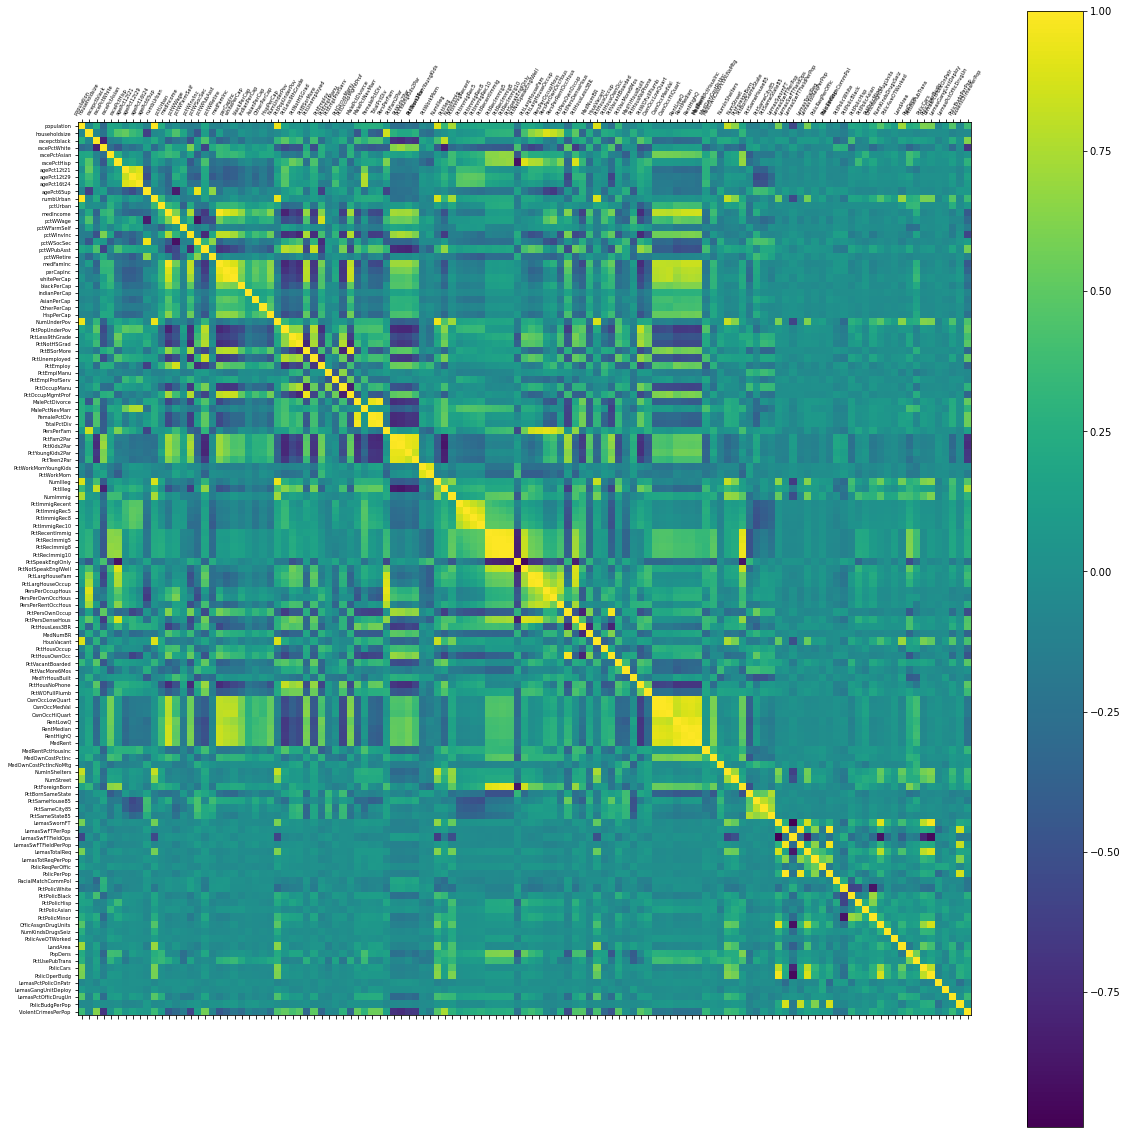

In [ ]:
print('Q.2.c\n')
fig = plt.figure(figsize=(20,20))
plt.matshow(df.corr(),fignum=fig.number)
plt.xticks(range(len(df.columns)),df.columns,fontsize=5,rotation=60)
plt.yticks(range(len(df.columns)),df.columns,fontsize=5,rotation=0)
colors= plt.colorbar()
plt.show()

In [ ]:
print('Q.2.d\n')
coef_var = df.std()/df.mean()
print(coef_var)

Q.2.d

population             2.203503
householdsize          0.353298
racepctblack           1.410920
racePctWhite           0.323782
racePctAsian           1.359162
                         ...   
LemasPctPolicOnPatr    0.122331
LemasGangUnitDeploy    0.368040
LemasPctOfficDrugUn    2.555266
PolicBudgPerPop        0.337281
ViolentCrimesPerPop    0.979015
Length: 123, dtype: float64


In [ ]:
print('Q.2.e\n')
df2 = pd.DataFrame(coef_var)
df2  =df2.reset_index()
df2=df2.rename(columns={'index':'feature',0:'CV'})
print(df2.columns)

Q.2.e

Index(['feature', 'CV'], dtype='object')


In [ ]:
print(df2.columns)
df2 = df2.sort_values(by="CV",ascending=False).reset_index(drop=True)
print(df2)

Index(['feature', 'CV'], dtype='object')
                 feature        CV
0              NumStreet  4.407702
1          NumInShelters  3.485481
2               NumIlleg  2.994196
3               NumImmig  2.900497
4    LemasPctOfficDrugUn  2.555266
..                   ...       ...
118    NumKindsDrugsSeiz  0.145956
119   RacialMatchCommPol  0.131417
120  LemasPctPolicOnPatr  0.122331
121        PctPolicWhite  0.121659
122    LemasSwFTFieldOps  0.057126

[123 rows x 2 columns]


In [ ]:
highest_cv = int(128**0.5)
# print(highest_cv)
df2=df2.iloc[:highest_cv,:]
temp_cols = df2['feature'].values
# temp_cols

In [ ]:
temp_df = df[temp_cols]
pp = sbn.pairplot(temp_df,diag_kind='kde')

Inferences:
1. There is a linear relationship between 'population' (population for community) and 'numbUrban' (number of people living in areas classified as urban). plot(7,8)
2. There is a linear relationship betweeen 'NumIlleg' (number of kids born to never married) and 'population' (population for community) plot(3,7)
3. There is a linear relationship betweeen 'NumUnderPov' (number of people under the poverty level) and 'NumIlleg' (number of kids born to never married) plot(6,3)
-So they represent a positive correlation between them.

In [ ]:
print('Q.2.f\n')
mod = LinearRegression()
mod.fit(train_x,train_y)
pred = mod.predict(test_x)
# rmse = math.sqrt(metrics.mean_squared_error(test_y,pred))
print(f"The test error of the Linear regression model is {metrics.mean_squared_error(test_y,pred)}\n")

In [ ]:

alpha_arr = 10**np.linspace(10,-2,100)*0.5
# alpha_arr


In [ ]:
print('Q.2.g\n')
ridge_cv = RidgeCV(alphas=alpha_arr,fit_intercept=True,cv=10,scoring='neg_mean_squared_error')
ridge_cv.fit(train_x,train_y)
ideal_lambda_rr = ridge_cv.alpha_
print(f"Best regularization parameter = {ideal_lambda_rr}\n")
ridge_mod = Ridge(alpha=ideal_lambda_rr,normalize=True)
ridge_mod.fit(train_x,train_y)
pred_rr = ridge_mod.predict(test_x)
# rmse_rr = math.sqrt(metrics.mean_squared_error(test_y,pred_rr))
print(f"The test error rate of the Ridge Regression Model is {metrics.mean_squared_error(test_y,pred_rr)}\n")

In [ ]:
# sklearn.metrics.get_scorer_names()

In [ ]:
print('Q.2.h\n')
lasso_cv = LassoCV(eps=1e-3,alphas=alpha_arr,fit_intercept=True,cv=10,max_iter=10000)
lasso_cv.fit(train_x,train_y)
ideal_lambda_lasso = lasso_cv.alpha_
print(f"Best regularization parameter = {ideal_lambda_lasso}\n")
lasso_mod = Lasso(alpha=ideal_lambda_lasso)
lasso_mod.fit(train_x,train_y)
pred_lasso = lasso_mod.predict(test_x)
print(f"The test error rate of the Lasso Regression Model is {metrics.mean_squared_error(test_y,pred_lasso)}\n")

## reasons for standardising variables:

### Lasso regression puts constraints on the size of the coefficients associated to each variable. However, this value will depend on the magnitude of each variable. It is therefore necessary to center and reduce, or standardize, the variables.

### The result of centering the variables means that there is no longer an intercept. This applies equally to ridge regression, by the way.

In [ ]:
coef = lasso_mod.coef_
print(coef)
unstd_cols=[]
for i in range(0,len(coef)):
    if coef[i]!=0.0 or coef[i]!=-0.0:
        unstd_cols.append(train_x.columns[i])
print(unstd_cols)

In [ ]:
print("Standardized Lasso\n")
std_train_x  = StandardScaler().fit_transform(train_x)
std_test_x = StandardScaler().fit_transform(test_x)
lasso_cv.fit(std_train_x,train_y)
std_ideal_lambda = lasso_cv.alpha_
print(f"Best regularization parameter = {std_ideal_lambda}\n")
std_lasso_mod=Lasso(alpha=std_ideal_lambda)
std_lasso_mod.fit(std_train_x,train_y)
std_pred = std_lasso_mod.predict(std_test_x)
print(f"The test error rate of the Standardized Lasso Regression Model is {metrics.mean_squared_error(test_y,std_pred)}\n")

In [ ]:
print(f'The test error for unstandardized Lasso regression is {metrics.mean_squared_error(test_y,pred_lasso)} and that of standardized Lasso is {metrics.mean_squared_error(test_y,std_pred)}\n')

Therefore it can be inferred that Standardized Lasso Regression gives a better accuracy as compared to unstandardized Lassso Regression Model.

In [ ]:
print('Q.2.i\n')
m = len(train_x.columns)
mse_arr=[]
# print(m)
pca = PCA()
reduced_train_x = pca.fit_transform(std_train_x)
n = len(reduced_train_x)
# print(n)
for i in range(0,m):
    temp_mod = LinearRegression()
    k_fold = KFold(n_splits=10,shuffle=True,random_state=1)
    cv = cross_val_score(temp_mod,reduced_train_x[:,0:i+1],train_y,cv =10, scoring='neg_mean_squared_error')
    pass_mse = np.mean(np.abs(cv))
    mse_arr.append(pass_mse)
# print(mse_arr)
# print(len(mse_arr))
min_mse = min(mse_arr)
best_m = mse_arr.index(min_mse)+1
print(best_m)

In [ ]:
best_pca = PCA(n_components=best_m)
best_train_x = best_pca.fit_transform(train_x)
best_test_x = best_pca.fit_transform(test_x)
best_mod = LinearRegression()
best_mod.fit(best_train_x,train_y)
best_pred = best_mod.predict(best_test_x)
print(f"The test error rate of the Linear Regression after PCA is {metrics.mean_squared_error(test_y,best_pred)}\n")

In [ ]:
print('Q.2.i\n')
warnings.filterwarnings(action='ignore')
xgb = XGBRegressor()
params = {'max_depth': [2,3],
          'eta': [0.1],
          'colsample_bytree': [1.0],
          'colsample_bylevel': [0.3],
          'subsample': [0.9],
          'gamma': [0],
          'lambda': [1],
          'alpha':np.linspace(-2,5,10),
          'min_child_weight':[1]
         }
grid = GridSearchCV(estimator=xgb,param_grid=params,cv=4,scoring='neg_mean_squared_error',verbose=True)
grid_mod=grid.fit(train_x,train_y)
grid_pred = grid_mod.predict(test_x)
pd.DataFrame(grid.cv_results_)

From the above dataframe, the minimum test MSE is found to be 0.004660	for alpha 0.33. (Last column with rank=1)